In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
with open('./traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('./traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('./traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

36


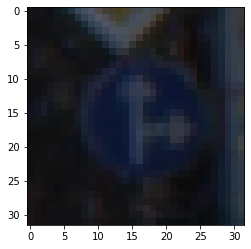

In [5]:
# Show a random data in the dataset
plt.imshow(X_train[1000])
print(y_train[1000])

37


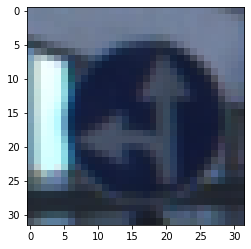

In [6]:
plt.imshow(X_train[5000])
print(y_train[5000])

31


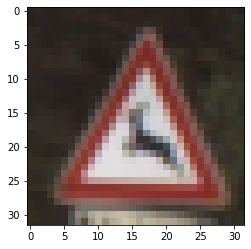

In [7]:
plt.imshow(X_train[500])
print(y_train[500])

11


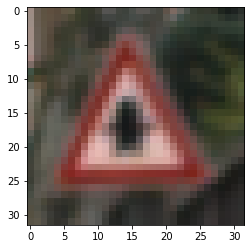

In [8]:
plt.imshow(X_train[9199])
print(y_train[9199])

41


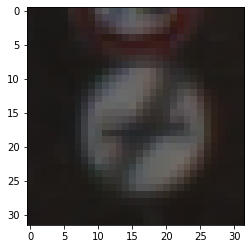

In [9]:
plt.imshow(X_train[0])
print(y_train[0])

In [10]:
# Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

In [12]:
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [13]:
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [14]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [24]:
cnn = Sequential()
cnn.add(Conv2D(filters=6, kernel_size=(5,5), activation="relu", input_shape=(32,32,1)))
cnn.add(AveragePooling2D())
cnn.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu"))
cnn.add(AveragePooling2D())
cnn.add(Flatten())
cnn.add(Dense(units=120, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=84, activation="relu"))
cnn.add(Dense(units=43, activation="softmax"))

In [25]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [26]:
cnn.fit(X_train_gray_norm, y_train, batch_size=500,epochs=10, verbose=1, validation_data=(X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 5s 136us/step - loss: 3.3137 - accuracy: 0.1339 - val_loss: 2.8038 - val_accuracy: 0.2878
Epoch 2/10
34799/34799 [==============================] - 5s 133us/step - loss: 1.9548 - accuracy: 0.4557 - val_loss: 1.2377 - val_accuracy: 0.6379
Epoch 3/10
34799/34799 [==============================] - 5s 133us/step - loss: 1.1522 - accuracy: 0.6485 - val_loss: 0.8271 - val_accuracy: 0.7494
Epoch 4/10
34799/34799 [==============================] - 5s 139us/step - loss: 0.8740 - accuracy: 0.7354 - val_loss: 0.6828 - val_accuracy: 0.7964
Epoch 5/10
34799/34799 [==============================] - 5s 153us/step - loss: 0.7235 - accuracy: 0.7846 - val_loss: 0.5966 - val_accuracy: 0.8166
Epoch 6/10
34799/34799 [==============================] - 5s 144us/step - loss: 0.6312 - accuracy: 0.8129 - val_loss: 0.5162 - val_accuracy: 0.8488
Epoch 7/10
34799/34799 [==============================] - 4s 12